# Tushar Tulashidas Naik

# Question:
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

## I will start the task of mobile price classification with machine learning by importing the necessary Python libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

## head-->This will display first 5 data present in the data set

In [2]:
df = pd.read_csv("mobile_data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## shape-->tells the number of rows and columns of a given DataFrame

In [3]:
df.shape

(2000, 21)

## The info() method prints information about the DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## value_counts() function returns object containing counts of unique values

In [5]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## It will display all the null and non-null values in the data set

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## We have use Box Plot for visual representation of numerical data through their quartiles. Boxplot is also used for detect the outlier in data set.

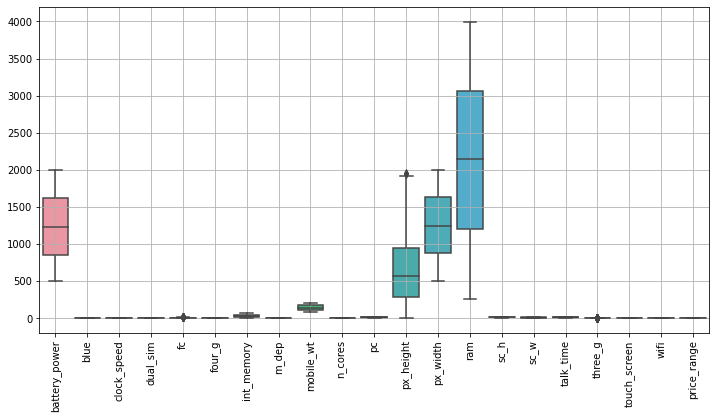

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df)
plt.xticks(rotation=90)
plt.grid()

## The describe() method returns description of the data in the DataFrame

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Here i have plotted heat map to se correlation in my data set for easy understanding
#### According to heat map C bar lighter colour means good relation so 
#### Battery power has good relation with price range
#### Ram is having good relation with price range
#### px_height	px_width is having good relation with price range

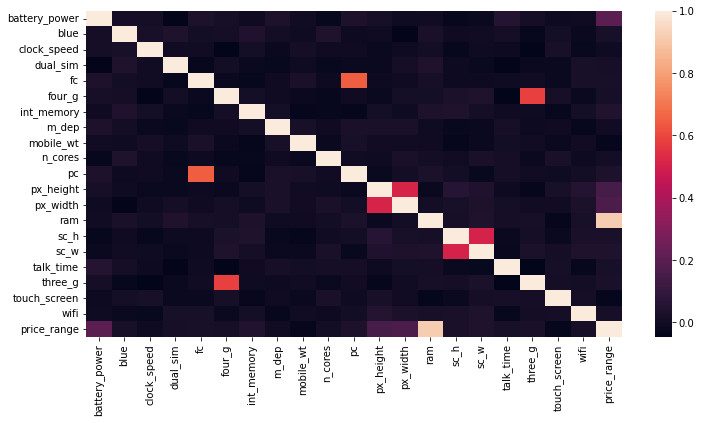

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())
plt.show()

## Visualizing the data Using (Box plot, Bar plot, Sub plot, Count plot, Line plot)
## Plotting Relation Between Price Range and Battery Power 
### We can see mobiles which belong to the price range 3 i.e more than 30k having very good    battery power (more than 1200)
### We can see mobiles which belong to the price range 0  having very low battery power than other price ranges

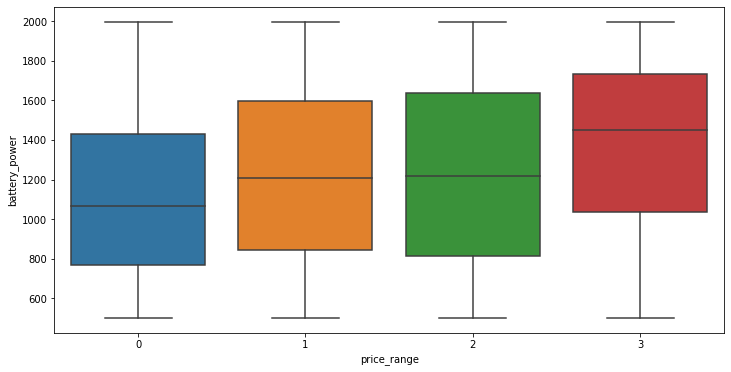

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x="price_range",y="battery_power",data=df)
plt.show()

# Plotting Relation Between Price Range and px_height/width

### We can see mobiles belong to 3rd category are having higher pixel heights(>700,>750)
### Mobiles belong to 0 category are having lower pixel heights around 525 

### Mobiles belong to 3rd category are having higher pixel width(>1200)
### Mobiles belong to 0 category are having lower pixel width around 1000

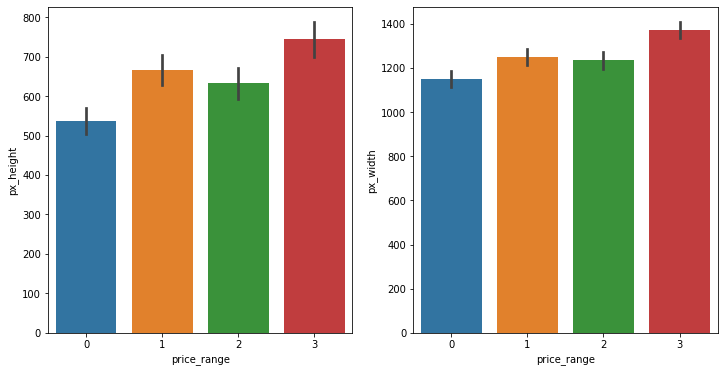

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x="price_range",y="px_height",data=df)
plt.subplot(1,2,2)
sns.barplot(x="price_range",y="px_width",data=df)
plt.show()

# Plotting Relation Between Price Range and Ram

### Here we can see 3rd category having higher ram and mobiles price range
### And Mobiles belonging to zero category are having lower rams

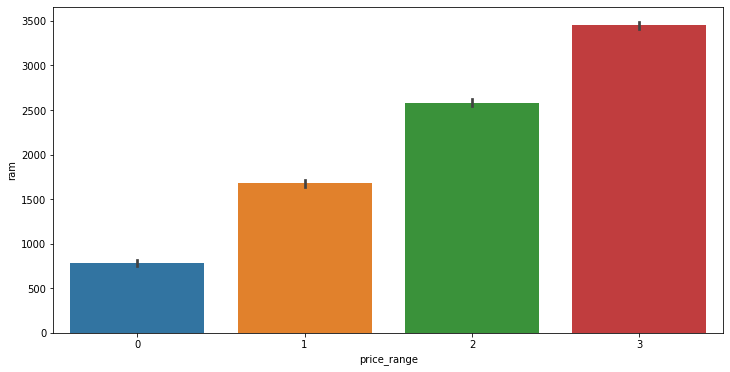

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x="price_range",y="ram",data=df)
plt.show()

# Plotting Relation Between Price Range 3G/4G

### Here i am plotting count plot to see relation and also to see how many 3g mobiles are there and how many are not 3g mobiles

### From legend we can see the last category belongs to 3g and the tallest building category belong to 3g facility and mostly belong to second price range and as there can be chances of 4g mobiles so here we see the second range highest

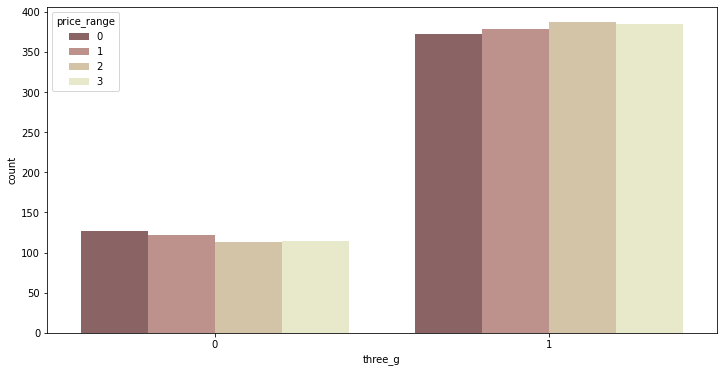

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["three_g"],hue=df["price_range"],palette="pink")
plt.show()

# Plotting Relation Between Price Range 4G

### Mobiles which belong to 4g category are belong to 3rd category that means they are costly mobiles last block belongs to 4g category and the 0 category does not belong to 4g 


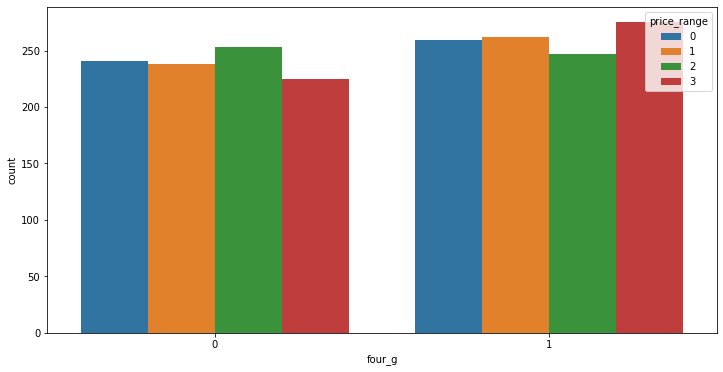

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["four_g"],hue=df["price_range"])
plt.show()

# Plotting Relation Between Price Range dual_sim

### Here we can see x is given as price range and we have plotted line plot and it is continious graph as there is no such category of 0.1 and 0.5

### Dual sim facilities that is 1 which is orange line 
### Mobiles belongs to Zero category are the cheapest mobiles and lower memory
### Mobiles belongs to One  category are the costliest mobiles and good memory

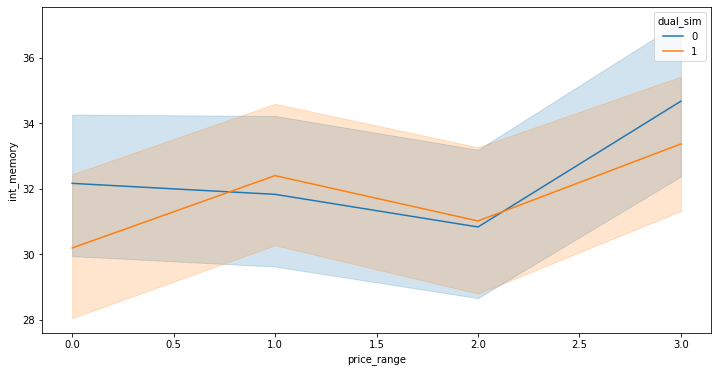

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x="price_range", y="int_memory",data=df,hue="dual_sim")
plt.show()

# Data Preprocessing
# Splitting the data into X and Y training and testing

In [16]:
x=df.iloc[:,:-1]
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [17]:
y=df.iloc[:,-1]
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# train_test_split (splitting data into training and testing with test size 0.3)

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
# Initializing the Model
knn=KNeighborsClassifier(n_neighbors=5)

# Fitting the Model
knn.fit(xtrain,ytrain)

# Predict using the Model
ypred=knn.predict(xtest)

In [20]:
accuracy_score(ytest,ypred)

0.92

In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       135
           1       0.91      0.91      0.91       149
           2       0.88      0.89      0.88       168
           3       0.94      0.91      0.93       148

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [22]:
ypred

array([0, 0, 1, 0, 3, 2, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 0, 1, 1, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 3, 0, 3, 2, 1,
       0, 2, 3, 2, 1, 1, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 1,
       1, 1, 3, 0, 1, 1, 2, 2, 3, 0, 2, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 2, 3, 2, 1,
       0, 2, 1, 0, 3, 2, 3, 1, 2, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 2, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 3, 0, 2, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 2, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 2, 2, 3, 3, 2,

In [23]:
new_df=(x)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [24]:
new_df.shape

(2000, 20)

In [25]:
new_pred=knn.predict(new_df)

In [26]:
new_pred

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [27]:
new_df["Predicted_price"]=new_pred

In [28]:
new_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predicted_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# New column which is Predicted_price is displayed which includes values in the form of (0,1,2,3)
### 0 (low cost)-Cost of Mobile will be Low
### 1 (medium cost)-Cost of Mobile will be Medium
### 2 (high cost)-Cost of Mobile will be High
### 3 (very high cost)-Cost of Mobile will be Very High

In [29]:
new_df["Predicted_price"]

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: Predicted_price, Length: 2000, dtype: int64

# Mobile price predicted and plotted on the basis of battery_power and shown in which price range it will fall (0,1,2,3)

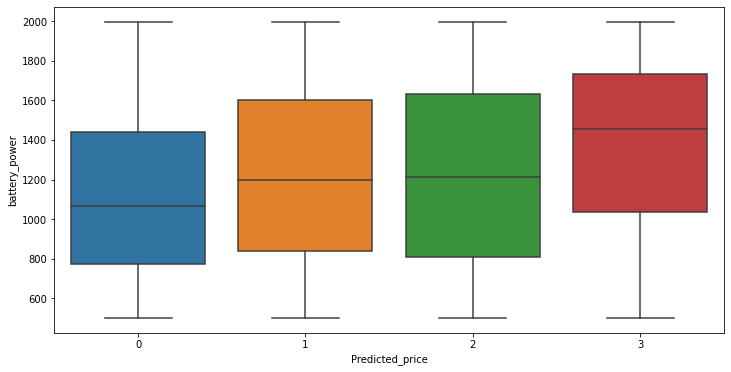

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Predicted_price",y="battery_power",data=new_df)
plt.show()

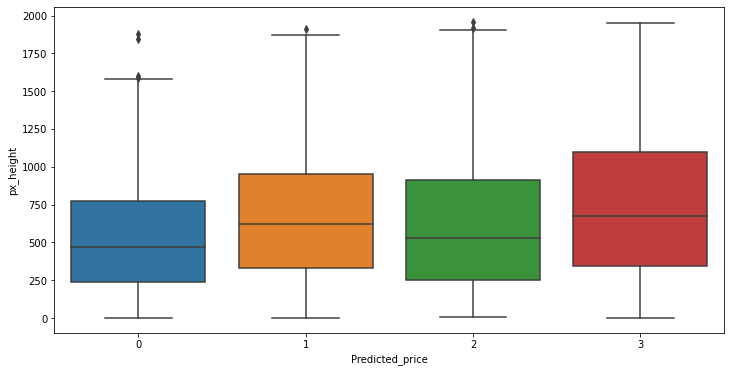

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Predicted_price",y="px_height",data=new_df)
plt.show()

# Since our task is to classify the price range of mobile phones and not to predict the actual prices the price range is as shown in graph which includes:
## 0 (low cost)-Cost of Mobile will be Low (1000 to 10000)
## 1 (medium cost)-Cost of Mobile will be Medium  (10000 to 20000)
## 2 (high cost)-Cost of Mobile will be High  (20000 to 30000)
## 3 (very high cost)-Cost of Mobile will be Very High (30000 and above)

# Data Trained on different models and output its classification report

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [38]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))

In [39]:
lreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()

In [40]:
mymodel(lreg)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       135
           1       0.53      0.58      0.55       149
           2       0.53      0.40      0.45       168
           3       0.67      0.78      0.72       148

    accuracy                           0.63       600
   macro avg       0.63      0.64      0.63       600
weighted avg       0.62      0.63      0.62       600



In [41]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       135
           1       0.91      0.91      0.91       149
           2       0.88      0.89      0.88       168
           3       0.94      0.91      0.93       148

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [42]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       135
           1       0.93      0.93      0.93       149
           2       0.94      0.90      0.92       168
           3       0.95      0.97      0.96       148

    accuracy                           0.94       600
   macro avg       0.94      0.95      0.94       600
weighted avg       0.94      0.94      0.94       600



In [43]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       135
           1       0.77      0.87      0.82       149
           2       0.85      0.80      0.83       168
           3       0.92      0.91      0.92       148

    accuracy                           0.86       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.86      0.86       600



In [44]:
ac_list=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    ac_list.append(ac)

In [45]:
print(ac_list)

[0.8916666666666667, 0.8966666666666666, 0.9133333333333333, 0.9066666666666666, 0.92, 0.9183333333333333, 0.92, 0.92, 0.9233333333333333, 0.9183333333333333, 0.9133333333333333, 0.915, 0.92, 0.9183333333333333, 0.925, 0.9183333333333333, 0.925, 0.9166666666666666, 0.9266666666666666, 0.9283333333333333, 0.925, 0.9166666666666666, 0.9166666666666666, 0.9133333333333333, 0.9166666666666666, 0.9083333333333333, 0.9116666666666666, 0.915, 0.9133333333333333]


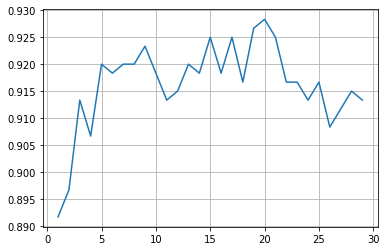

In [46]:
plt.plot(range(1,30),ac_list)
plt.grid()